In [1]:
# Import libraries
import numpy as np
import pandas as pd
import random
import seaborn
import matplotlib.pyplot as plt
import scipy
from scipy.fft import fft, ifft, fftfreq
seaborn.set_palette(seaborn.color_palette())
import warnings; warnings.simplefilter('ignore')

In [2]:
pwd

'/Users/starfarmer2/Desktop/Jasper/Coding Files/DIIG/Aquatrax/Aquatrax_F23/Code/src/Small_Leaks'

In [3]:
# Read dataset
FILE_NAME = '../../data/Positive_Meters_Data/Aquatrax_SmallLeak.csv'
df = pd.read_csv(FILE_NAME)
df

AccountNumber         Usagedate  Value      MeterNumber  Unnamed: 4  \
0       0250780-511949  08-01-2022 00:00      6  0250780-10450-1         NaN   
1       0250780-511949  08-01-2022 01:00      2  0250780-10450-1         NaN   
2       0250780-511949  08-01-2022 02:00      2  0250780-10450-1         NaN   
3       0250780-511949  08-01-2022 03:00      2  0250780-10450-1         NaN   
4       0250780-511949  08-01-2022 04:00      1  0250780-10450-1         NaN   
...                ...               ...    ...              ...         ...   
125858   5751740-68085  09-04-2023 19:00      8  5751740-10450-1         NaN   
125859   5751740-68085  09-04-2023 20:00      9  5751740-10450-1         NaN   
125860   5751740-68085  09-04-2023 21:00      8  5751740-10450-1         NaN   
125861   5751740-68085  09-04-2023 22:00      9  5751740-10450-1         NaN   
125862   5751740-68085  09-04-2023 23:00      8  5751740-10450-1         NaN   

        Unnamed: 5      Unnamed: 6  
0              NaN   AccountNumber  
1              NaN  0250780-511949  
2              NaN  0751760-445274  
3              NaN  0800240-294760  
4              NaN   1000320-20089  
...            ...             ...  
125858         NaN             NaN  
125859         NaN             NaN  
125860         NaN             NaN  
125861         NaN             NaN  
125862         NaN             NaN  

[125863 rows x 7 columns]

In [4]:
# Extract data from specific MeterID
METERNUM = "0250780-10450-1"
df_account = df.loc[df['MeterNumber']==METERNUM]
df_account = df_account.iloc[:,:4]
df_account

AccountNumber         Usagedate  Value      MeterNumber
0     0250780-511949  08-01-2022 00:00      6  0250780-10450-1
1     0250780-511949  08-01-2022 01:00      2  0250780-10450-1
2     0250780-511949  08-01-2022 02:00      2  0250780-10450-1
3     0250780-511949  08-01-2022 03:00      2  0250780-10450-1
4     0250780-511949  08-01-2022 04:00      1  0250780-10450-1
...              ...               ...    ...              ...
9107  0250780-511949  09-04-2023 11:00     17  0250780-10450-1
9108  0250780-511949  09-04-2023 12:00      2  0250780-10450-1
9109  0250780-511949  09-04-2023 13:00      0  0250780-10450-1
9110  0250780-511949  09-04-2023 14:00      4  0250780-10450-1
9111  0250780-511949  09-04-2023 15:00      8  0250780-10450-1

[9112 rows x 4 columns]

In [5]:
df_account['FFT_W'] = [i/len(df_account) for i in range(len(df_account))]
df_account['FFT_Period'] = 1/df_account['FFT_W']
df_account['FFT'] = fft(df_account['Value'])
df_account['FFTA'] = np.abs(df_account['FFT'])
df_account

AccountNumber         Usagedate  Value      MeterNumber     FFT_W  \
0     0250780-511949  08-01-2022 00:00      6  0250780-10450-1  0.000000   
1     0250780-511949  08-01-2022 01:00      2  0250780-10450-1  0.000110   
2     0250780-511949  08-01-2022 02:00      2  0250780-10450-1  0.000219   
3     0250780-511949  08-01-2022 03:00      2  0250780-10450-1  0.000329   
4     0250780-511949  08-01-2022 04:00      1  0250780-10450-1  0.000439   
...              ...               ...    ...              ...       ...   
9107  0250780-511949  09-04-2023 11:00     17  0250780-10450-1  0.999451   
9108  0250780-511949  09-04-2023 12:00      2  0250780-10450-1  0.999561   
9109  0250780-511949  09-04-2023 13:00      0  0250780-10450-1  0.999671   
9110  0250780-511949  09-04-2023 14:00      4  0250780-10450-1  0.999781   
9111  0250780-511949  09-04-2023 15:00      8  0250780-10450-1  0.999890   

       FFT_Period                       FFT          FFTA  
0             inf  25848000000.0-0.0000000j  25848.000000  
1     9112.000000  1961.0956303+34.9986270j   1961.407909  
2     4556.000000  -903.693161-3138.197875j   3265.723079  
3     3037.333333  -2946.012004-596.102925j   3005.715460  
4     2278.000000 -1076.363616-1069.959958j   1517.686708  
...           ...                       ...           ...  
9107     1.000549  2374.416420-1636.439233j   2883.710578  
9108     1.000439 -1076.363616+1069.959958j   1517.686708  
9109     1.000329  -2946.012004+596.102925j   3005.715460  
9110     1.000220  -903.693161+3138.197875j   3265.723079  
9111     1.000110  1961.0956303-34.9986270j   1961.407909  

[9112 rows x 8 columns]

In [6]:
df_account = df_account[["AccountNumber","FFT_Period","FFTA"]]
df_account

AccountNumber   FFT_Period          FFTA
0     0250780-511949          inf  25848.000000
1     0250780-511949  9112.000000   1961.407909
2     0250780-511949  4556.000000   3265.723079
3     0250780-511949  3037.333333   3005.715460
4     0250780-511949  2278.000000   1517.686708
...              ...          ...           ...
9107  0250780-511949     1.000549   2883.710578
9108  0250780-511949     1.000439   1517.686708
9109  0250780-511949     1.000329   3005.715460
9110  0250780-511949     1.000220   3265.723079
9111  0250780-511949     1.000110   1961.407909

[9112 rows x 3 columns]

In [7]:
df_account.pivot(index = "AccountNumber", columns = "FFT_Period", values = "FFTA")

FFT_Period      1.000110     1.000220     1.000329     1.000439     \
AccountNumber                                                        
0250780-511949  1961.407909  3265.723079   3005.71546  1517.686708   

FFT_Period      1.000549     1.000659     1.000769     1.000879     \
AccountNumber                                                        
0250780-511949  2883.710578   805.654595   1067.44788  1833.183356   

FFT_Period      1.000989     1.001099     ...  1012.444444  1139.000000  \
AccountNumber                             ...                             
0250780-511949   379.357121  1988.213091  ...   379.357121  1833.183356   

FFT_Period      1301.714286  1518.666667  1822.400000  2278.000000  \
AccountNumber                                                        
0250780-511949   1067.44788   805.654595  2883.710578  1517.686708   

FFT_Period      3037.333333  4556.000000  9112.000000  inf          
AccountNumber                                                       
0250780-511949   3005.71546  3265.723079  1961.407909      25848.0  

[1 rows x 9112 columns]

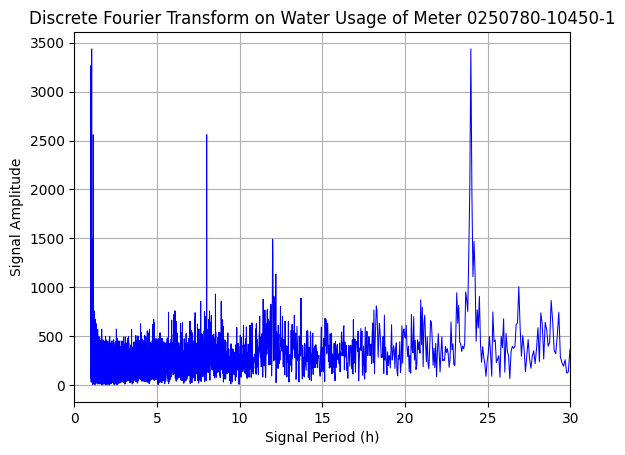

In [8]:
# Plot frequency domain result
plt.title(f'Discrete Fourier Transform on Water Usage of Meter {METERNUM}')
g = seaborn.lineplot(data=df_account,x="FFT_Period",y="FFTA",color='b',size=0.01)
g.set(xlim=(0, 30))#len(df_account['FFT_W'])))
g.set_xlabel(f'Signal Period (h)')
g.set_ylabel(f'Signal Amplitude')
legend = g.legend()
g.grid()
legend.remove()

In [9]:
#I added some corrections starting from here
meter_numbers = df['AccountNumber'].unique()
meter_numbers

array(['0250780-511949', '0751760-445274', '0800240-294760',
       '1000320-20089', '1202220-661732', '2850660-9136',
       '3153360-272144', '3821030-21500', '4300880-171830',
       '4351180-669343', '4354160-667558', '4403520-25706',
       '4951960-220808', '5751740-68085'], dtype=object)

In [10]:
#Number of data points for each unique account number
[len(df[df['AccountNumber']==number]) for number in df['AccountNumber'].unique()]  #we want to take the minimum of these (or a preset threshold)


[9112,
 9047,
 9095,
 8760,
 8920,
 9096,
 9143,
 7852,
 9144,
 9095,
 9096,
 9168,
 9192,
 9143]

In [11]:
#truncate each account number to have same length = threshold
LEN_THRES = 300
df_account_list = [df[df['AccountNumber'] == number].tail(LEN_THRES).iloc[:,:4] for number in df['AccountNumber'].unique()]
[len(e) for e in df_account_list]  #display number of data points for each account

[300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300]

In [12]:
#need to run the above block before running this one!!

#list to store pivoted account dataframes
df_account_pivoted_list = []

#conduct fourier transfor on each account
for (idx, df_account) in enumerate(df_account_list):
    df_account['FFT_F'] = fftfreq(len(df_account), 1)
    df_account['FFT_Period'] = 1/df_account['FFT_F']
    df_account['FFT'] = fft(df_account['Value'])
    df_account['FFTA'] = np.abs(df_account['FFT'])

    #remove large periods
    df_account = df_account.where(np.abs(df_account['FFT_Period']) <= 30)
    df_account = df_account.dropna()
    df_account_list[idx] = df_account

    #pivot each account dataframe
    df_account_pivoted = df_account.pivot(index="AccountNumber", columns='FFT_Period', values='FFTA')
    df_account_pivoted_list.append(df_account_pivoted)

df_account_pivoted_list[0]  #this shows 0 na's in dataframe


FFT_Period      -30.000000  -27.272727  -25.000000  -23.076923  -21.428571  \
AccountNumber                                                                
0250780-511949   63.461082   29.909408  120.146315   192.18317   75.414378   

FFT_Period      -20.000000  -18.750000  -17.647059  -16.666667  -15.789474  \
AccountNumber                                                                
0250780-511949   34.989099   26.263606   73.701227   75.157978   66.797505   

FFT_Period      ...   15.789474   16.666667   17.647059   18.750000  \
AccountNumber   ...                                                   
0250780-511949  ...   66.797505   75.157978   73.701227   26.263606   

FFT_Period       20.000000   21.428571   23.076923   25.000000   27.272727  \
AccountNumber                                                                
0250780-511949   34.989099   75.414378   192.18317  120.146315   29.909408   

FFT_Period       30.000000  
AccountNumber               
0250780-511949   63.461082  

[1 rows x 281 columns]

In [13]:
#combine all pivoted account dataframes
df_accounts_pivoted = pd.concat(df_account_pivoted_list)
df_accounts_pivoted

FFT_Period      -30.000000  -27.272727  -25.000000  -23.076923  -21.428571  \
AccountNumber                                                                
0250780-511949   63.461082   29.909408  120.146315  192.183170   75.414378   
0751760-445274    2.989229    5.699594    7.955531    9.628078   11.896248   
0800240-294760   79.963925   27.246607   55.852218  127.160226  130.652904   
1000320-20089     1.334729   52.980400   60.457444   55.271188   49.883103   
1202220-661732   14.399205  120.400719  286.232088  277.105402  156.402886   
2850660-9136    232.926707  262.622080  456.957995  417.818442  163.340814   
3153360-272144   45.057327   52.383522   70.562547   33.272500   46.004077   
3821030-21500    99.306504  248.874186  454.085900  483.540034  219.334182   
4300880-171830  237.000251  106.928670  540.873035  548.672072  123.462112   
4351180-669343   51.515812   55.775425  189.346306  183.830813   82.534701   
4354160-667558   53.841873   92.415216  140.159171  118.199159  116.507093   
4403520-25706   184.197882  205.718404  845.188597  889.336725  221.087641   
4951960-220808   47.322429   76.691130   14.681880  131.101037    7.623912   
5751740-68085    86.874713   18.216971  222.671160  187.791015   15.232305   

FFT_Period      -20.000000  -18.750000  -17.647059  -16.666667  -15.789474  \
AccountNumber                                                                
0250780-511949   34.989099   26.263606   73.701227   75.157978   66.797505   
0751760-445274   12.039975   12.817002   13.743793    9.464508    6.245667   
0800240-294760   99.466947   63.310052   39.171345   13.718563   33.436471   
1000320-20089    30.451542   33.977515   31.978473   10.116719   53.713384   
1202220-661732   87.586759   32.828913   40.035047   52.769874  244.655149   
2850660-9136    216.413783  228.687977  398.031668  186.704370  211.738523   
3153360-272144   45.380746    8.614412    3.233481   21.088549   23.452282   
3821030-21500    78.096437  187.359088  146.994296  556.415122  275.764002   
4300880-171830  260.730787   80.503089  131.281134   25.971766   13.042013   
4351180-669343   38.693490   42.592472   27.909433    9.867570   23.881792   
4354160-667558   14.297875   72.376744   36.208538  230.744668  122.416244   
4403520-25706   213.298816  404.302230  151.900387  340.171064  143.431488   
4951960-220808   23.215289   20.906463    8.436066   66.929103   58.626328   
5751740-68085    86.250331   44.830252  133.223136   39.604997   66.292080   

FFT_Period      ...   15.789474   16.666667   17.647059   18.750000  \
AccountNumber   ...                                                   
0250780-511949  ...   66.797505   75.157978   73.701227   26.263606   
0751760-445274  ...    6.245667    9.464508   13.743793   12.817002   
0800240-294760  ...   33.436471   13.718563   39.171345   63.310052   
1000320-20089   ...   53.713384   10.116719   31.978473   33.977515   
1202220-661732  ...  244.655149   52.769874   40.035047   32.828913   
2850660-9136    ...  211.738523  186.704370  398.031668  228.687977   
3153360-272144  ...   23.452282   21.088549    3.233481    8.614412   
3821030-21500   ...  275.764002  556.415122  146.994296  187.359088   
4300880-171830  ...   13.042013   25.971766  131.281134   80.503089   
4351180-669343  ...   23.881792    9.867570   27.909433   42.592472   
4354160-667558  ...  122.416244  230.744668   36.208538   72.376744   
4403520-25706   ...  143.431488  340.171064  151.900387  404.302230   
4951960-220808  ...   58.626328   66.929103    8.436066   20.906463   
5751740-68085   ...   66.292080   39.604997  133.223136   44.830252   

FFT_Period       20.000000   21.428571   23.076923   25.000000   27.272727  \
AccountNumber                                                                
0250780-511949   34.989099   75.414378  192.183170  120.146315   29.909408   
0751760-445274   12.039975   11.896248    9.628078    7.955531    5.699594   
0800240-294760   99.466947  130.652904  127.160226   

In [14]:
#save pivoted and combined dataframe
df_accounts_pivoted.to_csv("../../data/Processed_Data/leakage_fourier_transform_results.csv")

In [15]:
#Normalize data for PCA

#Replace standard deviation
std_df = df_accounts_pivoted.std(skipna=False)
#for i in range(len(std_df)):
    #if std_df[i] == 0:
        #std_df[i] = 1
std_df

FFT_Period
-30.000000     78.119148
-27.272727     84.549705
-25.000000    244.586901
-23.076923    245.033589
-21.428571     72.137621
                 ...    
 21.428571     72.137621
 23.076923    245.033589
 25.000000    244.586901
 27.272727     84.549705
 30.000000     78.119148
Length: 281, dtype: float64

In [16]:
normalized_df=(df_accounts_pivoted-df_accounts_pivoted.mean())/std_df
normalized_df

FFT_Period      -30.000000  -27.272727  -25.000000  -23.076923  -21.428571  \
AccountNumber                                                                
0250780-511949   -0.285038   -0.791699   -0.520739   -0.281112   -0.360001   
0751760-445274   -1.059135   -1.078037   -0.979434   -1.026132   -1.240515   
0800240-294760   -0.073785   -0.823193   -0.783607   -0.546475    0.405737   
1000320-20089    -1.080314   -0.518830   -0.764778   -0.839860   -0.713926   
1202220-661732   -0.913077    0.278575    0.158307    0.065462    0.762693   
2850660-9136      1.884285    1.960678    0.856325    0.639722    0.858869   
3153360-272144   -0.520623   -0.525889   -0.723463   -0.929638   -0.767699   
3821030-21500     0.173818    1.798077    0.844582    0.907937    1.635071   
4300880-171830    1.936430    0.119236    1.199414    1.173746    0.306055   
4351180-669343   -0.437948   -0.485772   -0.237813   -0.315198   -0.261297   
4354160-667558   -0.408173   -0.052420   -0.438916   -0.583046    0.209642   
4403520-25706     1.260509    1.287658    2.443616    2.564023    1.659378   
4951960-220808   -0.491628   -0.238394   -0.951933   -0.530392   -1.299739   
5751740-68085     0.014679   -0.929990   -0.101563   -0.299036   -1.194269   

FFT_Period      -20.000000  -18.750000  -17.647059  -16.666667  -15.789474  \
AccountNumber                                                                
0250780-511949   -0.651968   -0.572812   -0.139960   -0.259938   -0.324543   
0751760-445274   -0.930865   -0.693744   -0.715772   -0.667546   -0.998324   
0800240-294760    0.131620   -0.239633   -0.471574   -0.641151   -0.695763   
1000320-20089    -0.707113   -0.503436   -0.540652   -0.663499   -0.470135   
1202220-661732   -0.012758   -0.513766   -0.463279   -0.398849    1.654540   
2850660-9136      1.552855    1.247702    2.974802    0.432173    1.288266   
3153360-272144   -0.525681   -0.731541   -0.816709   -0.595422   -0.806860   
3821030-21500    -0.128092    0.876009    0.563922    2.726113    2.000699   
4300880-171830    2.091432   -0.085006    0.413018   -0.565123   -0.922699   
4351180-669343   -0.606950   -0.425957   -0.579730   -0.665045   -0.802081   
4354160-667558   -0.903425   -0.158091   -0.500028    0.705429    0.294346   
4403520-25706     1.514999    2.827098    0.611038    1.384386    0.528190   
4951960-220808   -0.795054   -0.620992   -0.766745   -0.310996   -0.415467   
5751740-68085    -0.028999   -0.405832    0.431668   -0.480533   -0.330167   

FFT_Period      ...   15.789474   16.666667   17.647059   18.750000  \
AccountNumber   ...                                                   
0250780-511949  ...   -0.324543   -0.259938   -0.139960   -0.572812   
0751760-445274  ...   -0.998324   -0.667546   -0.715772   -0.693744   
0800240-294760  ...   -0.695763   -0.641151   -0.471574   -0.239633   
1000320-20089   ...   -0.470135   -0.663499   -0.540652   -0.503436   
1202220-661732  ...    1.654540   -0.398849   -0.463279   -0.513766   
2850660-9136    ...    1.288266    0.432173    2.974802    1.247702   
3153360-272144  ...   -0.806860   -0.595422   -0.816709   -0.731541   
3821030-21500   ...    2.000699    2.726113    0.563922    0.876009   
4300880-171830  ...   -0.922699   -0.565123    0.413018   -0.085006   
4351180-669343  ...   -0.802081   -0.665045   -0.579730   -0.425957   
4354160-667558  ...    0.294346    0.705429   -0.500028   -0.158091   
4403520-25706   ...    0.528190    1.384386    0.611038    2.827098   
4951960-220808  ...   -0.415467   -0.310996   -0.766745   -0.620992   
5751740-68085   ...   -0.330167   -0.480533    0.431668   -0.405832   

FFT_Period       20.000000   21.428571   23.076923   25.000000   27.272727  \
AccountNumber                                                                
0250780-511949   -0.651968   -0.360001   -0.281112   -0.520739   -0.791699   
0751760-445274   -0.930865   -1.240515   -1.026132   -0.979434   -1.078037   
0800240-294760    0.131620    0.405737   -0.546475   

In [17]:
#Compute PCA
cov_df = normalized_df.cov() #is this the covariance matrix?
#covariance matrix summarizes the correlation direction between the variables
evals, evecs = np.linalg.eig(cov_df)
evecs = evecs.transpose()

In [18]:
#Sort eigenvectors by eigenvalues in decreasing order
#By ranking the eigenvectors, you get the principal components in order of significance
sort_evecs = []
for i in range(len(evals)):
    sort_evecs.append(np.append(evals[i],evecs[i]))
sort_evecs = sorted(sort_evecs,key=lambda x : -x[0])
sort_evals = [sort_evecs[i][0] for i in range(len(sort_evecs))]
sort_evecs = [sort_evecs[i][1:] for i in range(len(sort_evecs))]

sort_evals = np.array(sort_evals)
sort_evecs = np.array(sort_evecs)
sort_evecs

array([[ 0.06399779+0.j        ,  0.07058377+0.j        ,
         0.0634144 +0.j        , ...,  0.0634144 +0.j        ,
         0.07058377+0.j        ,  0.06399779+0.j        ],
       [-0.07815519+0.j        ,  0.0252103 +0.j        ,
        -0.01943159+0.j        , ..., -0.01943159+0.j        ,
         0.0252103 +0.j        , -0.07815519+0.j        ],
       [-0.01169877+0.j        ,  0.02572871+0.j        ,
        -0.06512307+0.j        , ..., -0.06512307+0.j        ,
         0.02572871+0.j        , -0.01169877+0.j        ],
       ...,
       [ 0.00609647+0.00352619j,  0.01156966-0.02138804j,
        -0.07075989+0.04578237j, ..., -0.07070445+0.04577406j,
         0.01107852-0.02131444j,  0.01066721+0.00478603j],
       [-0.04621149+0.j        , -0.02863043+0.j        ,
         0.08562262+0.j        , ...,  0.08526664+0.j        ,
        -0.025477  +0.j        , -0.04985214+0.j        ],
       [ 0.00347986+0.j        , -0.04130031+0.j        ,
        -0.06506415+0.j       

<AxesSubplot:title={'center':'Importance Scores of Component Axes from PCA'}, xlabel='Component (Eigenvector)', ylabel='Importance Score (Eigenvalue)'>

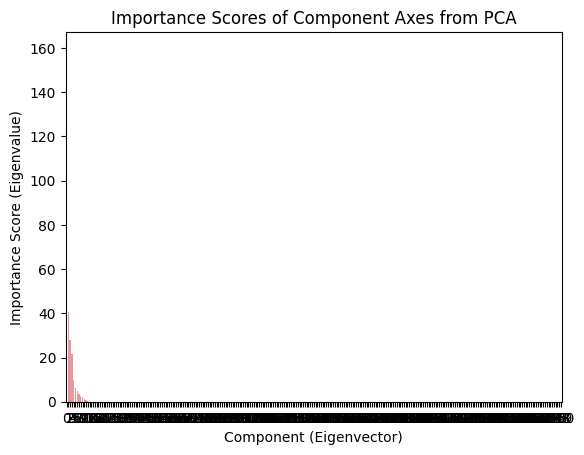

In [19]:
#Plot importance of e-vecs
#Shows that the first few components encompass the most amount of variation/information
plt.title("Importance Scores of Component Axes from PCA")
graph_evals = pd.DataFrame([[i,sort_evals[i]] for i in range(len(sort_evals))],columns=["Component (Eigenvector)","Importance Score (Eigenvalue)"])
seaborn.barplot(data=graph_evals,x="Component (Eigenvector)",y="Importance Score (Eigenvalue)")

<AxesSubplot:title={'center':'Meters on Axes of Components 0 and 1'}, xlabel='Component 0 Axis', ylabel='Component 1 Axis'>

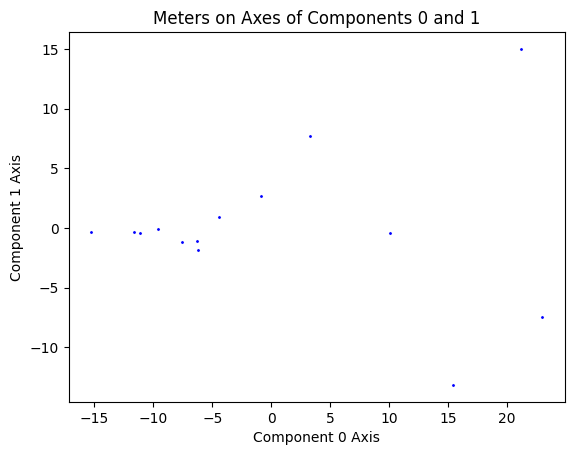

In [20]:
#Project data points onto eigenvectors
pc_array = np.array([np.dot(normalized_df, sort_evecs[i]) for i in range(len(sort_evecs))])

#Transpose so columns correspond to eigenvector directions
pc_array = pc_array.transpose()

#Graph main eigenvectors 0 and 1
plt.title("Meters on Axes of Components 0 and 1")
plt.xlabel("Component 0 Axis")
plt.ylabel('Component 1 Axis')
graph_df = pd.DataFrame(data=pc_array)
seaborn.scatterplot(data=graph_df,x=0,y=1,s=5,color='b')
# seaborn.scatterplot(data=cleaned_df,x='Age',y='DailyRate')

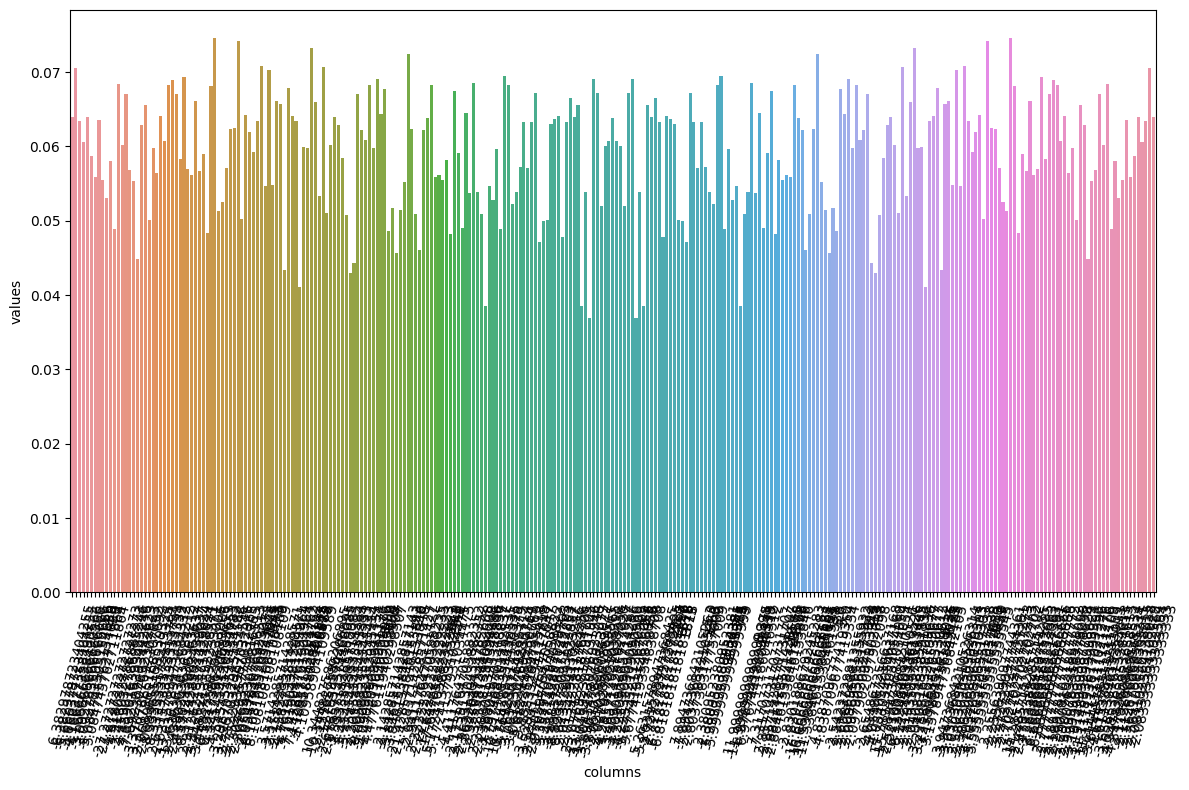

In [21]:
#Weights on variables in component 0
N=0
component_df = pd.DataFrame(np.array([normalized_df.columns, np.abs(sort_evecs[N])]).transpose(),columns=["columns","values"])
sort_component_df = component_df.sort_values(by="values",ascending=False)[:]

#Plot
plt.figure(figsize=(12,8))
plot = seaborn.barplot(data=sort_component_df,x="columns",y="values")
plot.set_xticklabels(sort_component_df["columns"], rotation=75)
plt.tight_layout()
plt.show()

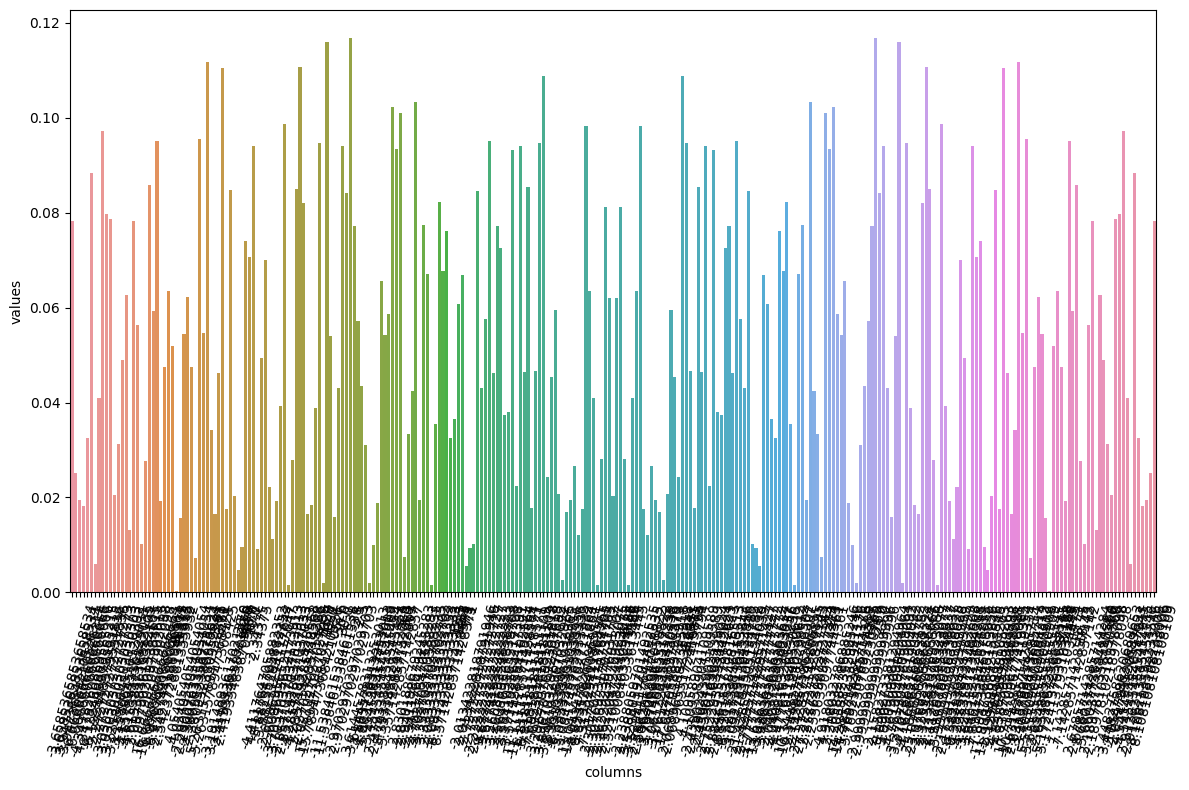

In [22]:
#Weights on variables in component 1
N=1
component_df = pd.DataFrame(np.array([normalized_df.columns, np.abs(sort_evecs[N])]).transpose(),columns=["columns","values"])
sort_component_df = component_df.sort_values(by="values",ascending=False)[:]

#Plot
plt.figure(figsize=(12,8))
plot = seaborn.barplot(data=sort_component_df,x="columns",y="values")
plot.set_xticklabels(sort_component_df["columns"], rotation=75)
plt.tight_layout()
plt.show()

In [23]:
feature_vector = sort_evecs[0:14]
feature_vector

array([[ 0.06399779+0.j,  0.07058377+0.j,  0.0634144 +0.j, ...,
         0.0634144 +0.j,  0.07058377+0.j,  0.06399779+0.j],
       [-0.07815519+0.j,  0.0252103 +0.j, -0.01943159+0.j, ...,
        -0.01943159+0.j,  0.0252103 +0.j, -0.07815519+0.j],
       [-0.01169877+0.j,  0.02572871+0.j, -0.06512307+0.j, ...,
        -0.06512307+0.j,  0.02572871+0.j, -0.01169877+0.j],
       ...,
       [-0.01228865+0.j, -0.04603099+0.j,  0.06134859+0.j, ...,
         0.06134859+0.j, -0.04603099+0.j, -0.01228865+0.j],
       [-0.07958528+0.j, -0.11707085+0.j, -0.00420938+0.j, ...,
        -0.00420938+0.j, -0.11707085+0.j, -0.07958528+0.j],
       [ 0.08142582+0.j, -0.1369229 +0.j, -0.01382938+0.j, ...,
        -0.01417183+0.j, -0.13388931+0.j,  0.00685783+0.j]])

In [24]:
final_data = feature_vector.__matmul__(normalized_df.transpose())
final_data.transpose()

0                    1                    2   \
AccountNumber                                                                   
0250780-511949  -7.531870+0.000000j  -1.136268+0.000000j   1.912322+0.000000j   
0751760-445274 -15.288067+0.000000j  -0.331448+0.000000j   0.932686+0.000000j   
0800240-294760  -6.177854+0.000000j  -1.801713+0.000000j   0.920349+0.000000j   
1000320-20089   -9.598464+0.000000j  -0.111307+0.000000j   1.652948+0.000000j   
1202220-661732  -0.904686+0.000000j   2.680658+0.000000j  -0.950392+0.000000j   
2850660-9136    22.990738+0.000000j  -7.486455+0.000000j  13.895555+0.000000j   
3153360-272144 -11.681833+0.000000j  -0.363781+0.000000j   1.241077+0.000000j   
3821030-21500   21.202420+0.000000j  15.006840+0.000000j  -1.961997+0.000000j   
4300880-171830  15.411645+0.000000j -13.136926+0.000000j  -9.859640+0.000000j   
4351180-669343  -6.262185+0.000000j  -1.114910+0.000000j  -3.514994+0.000000j   
4354160-667558   3.310855+0.000000j   7.715766+0.000000j   0.553424+0.000000j   
4403520-25706   10.107448+0.000000j  -0.426576+0.000000j  -6.807074+0.000000j   
4951960-220808 -11.147055+0.000000j  -0.413515+0.000000j   1.236950+0.000000j   
5751740-68085   -4.431093+0.000000j   0.919634+0.000000j   0.748787+0.000000j   

                                 3                   4                   5   \
AccountNumber                                                                 
0250780-511949   0.600241+0.000000j -0.267525+0.000000j  0.519993+0.000000j   
0751760-445274   0.207125+0.000000j -1.653552+0.000000j  0.346375+0.000000j   
0800240-294760  -0.724255+0.000000j -0.118421+0.000000j  0.875885+0.000000j   
1000320-20089   -0.232278+0.000000j -1.760162+0.000000j -0.576345+0.000000j   
1202220-661732   0.203315+0.000000j  9.500073+0.000000j  3.075701+0.000000j   
2850660-9136     1.378913+0.000000j -0.141661+0.000000j  0.609569+0.000000j   
3153360-272144  -0.265772+0.000000j -1.393116+0.000000j  1.000945+0.000000j   
3821030-21500   -3.500211+0.000000j -1.027051+0.000000j  0.807919+0.000000j   
4300880-171830  -6.900250+0.000000j -0.407365+0.000000j -0.621253+0.000000j   
4351180-669343  -1.658543+0.000000j -0.814392+0.000000j  2.475020+0.000000j   
4354160-667558  -3.208296+0.000000j -3.094882+0.000000j -1.493472+0.000000j   
4403520-25706   14.341095+0.000000j -1.375746+0.000000j -0.254253+0.000000j   
4951960-220808  -0.168811+0.000000j -1.351806+0.000000j  0.740171+0.000000j   
5751740-68085   -0.072273+0.000000j  3.905607+0.000000j -7.506256+0.000000j   

                                6                   7                   8   \
AccountNumber                                                                
0250780-511949  1.382074+0.000000j -1.614583+0.000000j  4.164022+0.000000j   
0751760-445274  0.821719+0.000000j  1.007014+0.000000j -0.301622+0.000000j   
0800240-294760  1.898834+0.000000j  0.201896+0.000000j -3.648090+0.000000j   
1000320-20089   0.188604+0.000000j -0.535961+0.000000j  0.474081+0.000000j   
1202220-661732 -0.425638+0.000000j -1.567014+0.000000j -0.260071+0.000000j   
2850660-9136   -0.888255+0.000000j  0.552888+0.000000j -0.082723+0.000000j   
3153360-272144  1.039755+0.000000j  0.722888+0.000000j -0.181609+0.000000j   
3821030-21500   2.432705+0.000000j  2.166152+0.000000j  0.585123+0.000000j   
4300880-171830  1.092537+0.000000j -0.733650+0.000000j  0.181156+0.000000j   
4351180-669343 -5.537226+0.000000j  3.174405+0.000000j  0.581641+0.000000j   
4354160-667558 -3.483708+0.000000j -4.283448+0.000000j -1.032146+0.000000j   
4403520-25706  -0.137876+0.000000j -0.374556+0.000000j -0.274954+0.000000j   
4951960-220808  2.130129+0.000000j -0.382360+0.000000j -0.304208+0.000000j   
5751740-68085  -0.513654+0.000000j  1.666330+0.000000j  0.099401+0.000000j   

                                9                   10                  11  \
AccountNumber                                                                
0250780-511949 -2.583306+0.000000j  0.466975+0.000000j -0.112450+0

In [25]:
from sklearn.decomposition import PCA
#this is the PCA using sklearn, which matches the above

In [26]:
pca_model = PCA(n_components=2)
principalComponents = pca_model.fit_transform(normalized_df)

In [27]:
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df


principal component 1  principal component 2
0               -7.531870              -1.136268
1              -15.288067              -0.331448
2               -6.177854              -1.801713
3               -9.598464              -0.111307
4               -0.904686               2.680658
5               22.990738              -7.486455
6              -11.681833              -0.363781
7               21.202420              15.006840
8               15.411645             -13.136926
9               -6.262185              -1.114910
10               3.310855               7.715766
11              10.107448              -0.426576
12             -11.147055              -0.413515
13              -4.431093               0.919634

In [28]:
NONLEAKAGE = '../../data/Negative_Meters_Data/Aquatrax_Nonleakage_Data_20accounts.csv'
df_non = pd.read_csv(NONLEAKAGE)
df_non

AccountNumber         Usagedate  Value      Meternumber
0        0050005-28920  08-01-2022 00:00      0  0050005-10450-1
1        0050005-28920  08-01-2022 01:00      2  0050005-10450-1
2        0050005-28920  08-01-2022 02:00      0  0050005-10450-1
3        0050005-28920  08-01-2022 03:00      0  0050005-10450-1
4        0050005-28920  08-01-2022 04:00      0  0050005-10450-1
...                ...               ...    ...              ...
173300  0050720-332189  08-13-2022 19:00      3  0050720-10450-1
173301  0050720-332189  08-13-2022 20:00      2  0050720-10450-1
173302  0050720-332189  08-13-2022 21:00      0  0050720-10450-1
173303  0050720-332189  08-13-2022 22:00      1  0050720-10450-1
173304  0050720-332189  08-13-2022 23:00      2  0050720-10450-1

[173305 rows x 4 columns]

In [29]:
meter_numbers_non = df_non['AccountNumber'].unique()
meter_numbers_non

array(['0050005-28920', '0050015-328466', '0050017-668118',
       '0050020-660260', '0050100-50430', '0050110-26', '0050180-66814',
       '0050200-530518', '0050240-149921', '0050280-110323',
       '0050320-28938', '0050340-66765', '0050360-579784',
       '0050414-50439', '0050420-28948', '0050460-28951', '0050520-28957',
       '0050620-22252', '0050700-328186', '0050720-332189'], dtype=object)

In [30]:
df_account_list_non = [df_non[df_non['AccountNumber'] == number].tail(LEN_THRES).iloc[:,:4] for number in df_non['AccountNumber'].unique()]
[len(e) for e in df_account_list_non]  #display number of data points for each account

[300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300]

In [31]:
#list to store pivoted account dataframes
df_account_pivoted_list_non = []

#conduct fourier transfor on each account
for (idx, df_account_non) in enumerate(df_account_list_non):
    df_account_non['FFT_F'] = fftfreq(len(df_account_non), 1)
    df_account_non['FFT_Period'] = 1/df_account_non['FFT_F']
    df_account_non['FFT'] = fft(df_account_non['Value'])
    df_account_non['FFTA'] = np.abs(df_account_non['FFT'])

    #remove large periods
    df_account_non = df_account_non.where(np.abs(df_account_non['FFT_Period']) <= 30)
    df_account_non = df_account_non.dropna()
    df_account_list_non[idx] = df_account_non

    #pivot each account dataframe
    df_account_pivoted_non = df_account_non.pivot(index="AccountNumber", columns='FFT_Period', values='FFTA')
    df_account_pivoted_list_non.append(df_account_pivoted_non)

df_account_pivoted_list_non[0]  #this shows 0 na's in dataframe

FFT_Period     -30.000000  -27.272727  -25.000000  -23.076923  -21.428571  \
AccountNumber                                                               
0050005-28920   11.649915    7.953557    2.936623   17.589581   15.623624   

FFT_Period     -20.000000  -18.750000  -17.647059  -16.666667  -15.789474  \
AccountNumber                                                               
0050005-28920    8.389818    4.428651   10.455886   10.968843    7.790124   

FFT_Period     ...   15.789474   16.666667   17.647059   18.750000  \
AccountNumber  ...                                                   
0050005-28920  ...    7.790124   10.968843   10.455886    4.428651   

FFT_Period      20.000000   21.428571   23.076923   25.000000   27.272727  \
AccountNumber                                                               
0050005-28920    8.389818   15.623624   17.589581    2.936623    7.953557   

FFT_Period      30.000000  
AccountNumber              
0050005-28920   11.649915  

[1 rows x 281 columns]

In [32]:
#combine all pivoted account dataframes
df_accounts_pivoted_non = pd.concat(df_account_pivoted_list_non)
df_accounts_pivoted_non

FFT_Period      -30.000000  -27.272727  -25.000000  -23.076923  -21.428571  \
AccountNumber                                                                
0050005-28920    11.649915    7.953557    2.936623   17.589581   15.623624   
0050015-328466   22.601286   86.430793   75.146125   95.181860   84.280536   
0050017-668118    6.977336   47.113896   41.651688   38.009616   32.482537   
0050020-660260   35.801829   16.286280   28.266437   42.805088   34.787625   
0050100-50430    59.601867   41.845230  106.004019   92.583251   63.773381   
0050110-26       21.888358   27.632705   48.113215   37.724137   24.970840   
0050180-66814    18.503932   25.616363   42.809543   20.754715   27.269216   
0050200-530518   31.940333   78.784945   74.530346   88.923835    9.583858   
0050240-149921   20.003309   61.500910   99.929920   97.301086   23.822814   
0050280-110323   45.148909   34.342576   83.142203   34.755027   61.800075   
0050320-28938   134.350204  152.515228  199.656576  184.761083   74.233138   
0050340-66765   105.615900   31.229917  171.742098  179.024472   29.185520   
0050360-579784  100.393814   92.145117   45.855648   86.739835  112.400466   
0050414-50439    11.278179   16.349863   39.167280   25.337101   21.736147   
0050420-28948    86.308174   63.838839  142.388011  185.781144   24.216198   
0050460-28951    21.296610   40.606639   33.226706  104.474867   93.433642   
0050520-28957     3.771199   15.727900   14.123522   12.823727    5.655231   
0050620-22252   276.510254  421.521962  493.641746  517.199998  505.162970   
0050700-328186   88.940427   90.921801   97.865660   88.188637   86.637244   
0050720-332189   25.005471   16.204666   29.429484   47.100911   26.601078   

FFT_Period      -20.000000  -18.750000  -17.647059  -16.666667  -15.789474  \
AccountNumber                                                                
0050005-28920     8.389818    4.428651   10.455886   10.968843    7.790124   
0050015-328466   70.301024   94.046686   66.498747   27.954873   72.674060   
0050017-668118   17.468357   14.837048   21.803024   45.539109   17.793749   
0050020-660260   24.573042   27.609976    4.787057   24.471634   10.324441   
0050100-50430    62.958926   18.959362   43.078972    5.270368   20.596080   
0050110-26       43.686918   38.475202   12.398503   23.401925   23.466294   
0050180-66814    26.704667   22.547593    8.286708    3.877510    5.440515   
0050200-530518   48.179864   38.396205    4.867648   49.312152   42.838974   
0050240-149921   30.465166   83.435152   20.092934   44.157812   72.880971   
0050280-110323   38.539249   24.208911    9.121563   21.663402   33.018092   
0050320-28938   132.927858   13.638379   81.012670   26.947279   37.070874   
0050340-66765   123.026579   15.468946   38.231779   36.756026   94.679773   
0050360-579784   60.594446   25.027124   70.374530   32.753550   30.100896   
0050414-50439    11.597159   14.144152   21.256775   17.996573   20.678799   
0050420-28948    24.558549   91.418727   80.009405   51.940575   61.088136   
0050460-28951    56.230623   69.965579   66.116689   81.043095   55.064898   
0050520-28957     7.987696   21.978817   13.328172    9.183556   13.054460   
0050620-22252   388.716256  349.502692  188.958091  193.069092  133.698236   
0050700-328186   88.476915   91.948777   86.006561   87.460171   92.377707   
0050720-332189   40.859352   59.061489   20.973333   25.053186   28.417804   

FFT_Period      ...   15.789474   16.666667   17.647059   18.750000  \
AccountNumber   ...                                                   
0050005-28920   ...    7.790124   10.968843   10.455886    4.428651   
0050015-328466  ...   72.674060   27.954873   66.498747   94.046686   
0050017-668118  ...   17.793749   45.539109   21.803024   14.837048   
0050020-660260  ...   10.324441   24.471634    4.787057   27.609976   
0050100-50430   ...   20.596080    5.270368   43.078972   18.959362   
0050110-26      ...   23.466294   23.401925   12.398503   38.475202  

In [33]:
#Normalize data for PCA

#Replace standard deviation
std_df_non = df_accounts_pivoted_non.std(skipna=False)
#for i in range(len(std_df)):
    #if std_df[i] == 0:
        #std_df[i] = 1
normalized_df_non=(df_accounts_pivoted_non-df_accounts_pivoted_non.mean())/std_df_non
normalized_df_non

FFT_Period      -30.000000  -27.272727  -25.000000  -23.076923  -21.428571  \
AccountNumber                                                                
0050005-28920    -0.695624   -0.667651   -0.841545   -0.732433   -0.486115   
0050015-328466   -0.525310    0.198748   -0.170412   -0.041590    0.152532   
0050017-668118   -0.768291   -0.235316   -0.481718   -0.550623   -0.329293   
0050020-660260   -0.320018   -0.575657   -0.606123   -0.507926   -0.307851   
0050100-50430     0.050116   -0.293483    0.116389   -0.064726   -0.038226   
0050110-26       -0.536398   -0.450391   -0.421663   -0.553165   -0.399167   
0050180-66814    -0.589032   -0.472651   -0.470956   -0.704252   -0.377788   
0050200-530518   -0.380071    0.114337   -0.176135   -0.097308   -0.542297   
0050240-149921   -0.565714   -0.076481    0.059935   -0.022721   -0.409846   
0050280-110323   -0.174654   -0.376313   -0.096095   -0.579600   -0.056582   
0050320-28938     1.212588    0.928330    0.986819    0.755980    0.059071   
0050340-66765     0.765717   -0.410677    0.727375    0.704904   -0.359962   
0050360-579784    0.684504    0.261835   -0.442645   -0.116753    0.414103   
0050414-50439    -0.701405   -0.574955   -0.504808   -0.663453   -0.429256   
0050420-28948     0.465447   -0.050670    0.454551    0.765062   -0.406187   
0050460-28951    -0.545600   -0.307157   -0.560021    0.041151    0.237674   
0050520-28957    -0.818152   -0.581821   -0.737571   -0.774866   -0.578841   
0050620-22252     3.423434    3.898201    3.719189    3.715852    4.067580   
0050700-328186    0.506383    0.248330    0.040749   -0.103854    0.174454   
0050720-332189   -0.487921   -0.576558   -0.595314   -0.469679   -0.384003   

FFT_Period      -20.000000  -18.750000  -17.647059  -16.666667  -15.789474  \
AccountNumber                                                                
0050005-28920    -0.680437   -0.684445   -0.737254   -0.709894   -1.037118   
0050015-328466    0.059636    0.505988    0.517575   -0.307579    0.839273   
0050017-668118   -0.571914   -0.546186   -0.483186    0.108906   -0.747821   
0050020-660260   -0.486986   -0.376518   -0.864182   -0.390079   -0.963828   
0050100-50430    -0.028130   -0.491428   -0.006806   -0.844863   -0.666780   
0050110-26       -0.258503   -0.232191   -0.693758   -0.415416   -0.583776   
0050180-66814    -0.461505   -0.443764   -0.785823   -0.877853   -1.105067   
0050200-530518   -0.204795   -0.233240   -0.862378    0.198271   -0.023534   
0050240-149921   -0.416553    0.365030   -0.521476    0.076190    0.845257   
0050280-110323   -0.320037   -0.421696   -0.767130   -0.456593   -0.307546   
0050320-28938     0.808264   -0.562108    0.842549   -0.331444   -0.190342   
0050340-66765     0.689906   -0.537792   -0.115337   -0.099122    1.475660   
0050360-579784   -0.056394   -0.410827    0.604355   -0.193921   -0.391908   
0050414-50439    -0.642097   -0.555390   -0.495417   -0.543442   -0.664388   
0050420-28948    -0.487159    0.471079    0.820085    0.260525    0.504217   
0050460-28951    -0.108558    0.186109    0.509020    0.949821    0.330030   
0050520-28957    -0.685244   -0.451319   -0.672942   -0.752179   -0.884878   
0050620-22252     3.865903    3.899313    3.259503    3.603169    2.604043   
0050700-328186    0.276907    0.478120    0.954365    1.101810    1.409087   
0050720-332189   -0.292303    0.041265   -0.501763   -0.376305   -0.440582   

FFT_Period      ...   15.789474   16.666667   17.647059   18.750000  \
AccountNumber   ...                                                   
0050005-28920   ...   -1.037118   -0.709894   -0.737254   -0.684445   
0050015-328466  ...    0.839273   -0.307579    0.517575    0.505988   
0050017-668118  ...   -0.747821    0.108906   -0.483186   -0.546186   
0050020-660260  ...   -0.963828   -0.390079   -0.864182   -0.376518   
0050100-50430   ...   -0.666780   -0.844863   -0.006806   -0.491428   
0050110-26      ...   -0.583776   -0.415416   -0.693758   -0.232191  

In [34]:
normalized_df

FFT_Period      -30.000000  -27.272727  -25.000000  -23.076923  -21.428571  \
AccountNumber                                                                
0250780-511949   -0.285038   -0.791699   -0.520739   -0.281112   -0.360001   
0751760-445274   -1.059135   -1.078037   -0.979434   -1.026132   -1.240515   
0800240-294760   -0.073785   -0.823193   -0.783607   -0.546475    0.405737   
1000320-20089    -1.080314   -0.518830   -0.764778   -0.839860   -0.713926   
1202220-661732   -0.913077    0.278575    0.158307    0.065462    0.762693   
2850660-9136      1.884285    1.960678    0.856325    0.639722    0.858869   
3153360-272144   -0.520623   -0.525889   -0.723463   -0.929638   -0.767699   
3821030-21500     0.173818    1.798077    0.844582    0.907937    1.635071   
4300880-171830    1.936430    0.119236    1.199414    1.173746    0.306055   
4351180-669343   -0.437948   -0.485772   -0.237813   -0.315198   -0.261297   
4354160-667558   -0.408173   -0.052420   -0.438916   -0.583046    0.209642   
4403520-25706     1.260509    1.287658    2.443616    2.564023    1.659378   
4951960-220808   -0.491628   -0.238394   -0.951933   -0.530392   -1.299739   
5751740-68085     0.014679   -0.929990   -0.101563   -0.299036   -1.194269   

FFT_Period      -20.000000  -18.750000  -17.647059  -16.666667  -15.789474  \
AccountNumber                                                                
0250780-511949   -0.651968   -0.572812   -0.139960   -0.259938   -0.324543   
0751760-445274   -0.930865   -0.693744   -0.715772   -0.667546   -0.998324   
0800240-294760    0.131620   -0.239633   -0.471574   -0.641151   -0.695763   
1000320-20089    -0.707113   -0.503436   -0.540652   -0.663499   -0.470135   
1202220-661732   -0.012758   -0.513766   -0.463279   -0.398849    1.654540   
2850660-9136      1.552855    1.247702    2.974802    0.432173    1.288266   
3153360-272144   -0.525681   -0.731541   -0.816709   -0.595422   -0.806860   
3821030-21500    -0.128092    0.876009    0.563922    2.726113    2.000699   
4300880-171830    2.091432   -0.085006    0.413018   -0.565123   -0.922699   
4351180-669343   -0.606950   -0.425957   -0.579730   -0.665045   -0.802081   
4354160-667558   -0.903425   -0.158091   -0.500028    0.705429    0.294346   
4403520-25706     1.514999    2.827098    0.611038    1.384386    0.528190   
4951960-220808   -0.795054   -0.620992   -0.766745   -0.310996   -0.415467   
5751740-68085    -0.028999   -0.405832    0.431668   -0.480533   -0.330167   

FFT_Period      ...   15.789474   16.666667   17.647059   18.750000  \
AccountNumber   ...                                                   
0250780-511949  ...   -0.324543   -0.259938   -0.139960   -0.572812   
0751760-445274  ...   -0.998324   -0.667546   -0.715772   -0.693744   
0800240-294760  ...   -0.695763   -0.641151   -0.471574   -0.239633   
1000320-20089   ...   -0.470135   -0.663499   -0.540652   -0.503436   
1202220-661732  ...    1.654540   -0.398849   -0.463279   -0.513766   
2850660-9136    ...    1.288266    0.432173    2.974802    1.247702   
3153360-272144  ...   -0.806860   -0.595422   -0.816709   -0.731541   
3821030-21500   ...    2.000699    2.726113    0.563922    0.876009   
4300880-171830  ...   -0.922699   -0.565123    0.413018   -0.085006   
4351180-669343  ...   -0.802081   -0.665045   -0.579730   -0.425957   
4354160-667558  ...    0.294346    0.705429   -0.500028   -0.158091   
4403520-25706   ...    0.528190    1.384386    0.611038    2.827098   
4951960-220808  ...   -0.415467   -0.310996   -0.766745   -0.620992   
5751740-68085   ...   -0.330167   -0.480533    0.431668   -0.405832   

FFT_Period       20.000000   21.428571   23.076923   25.000000   27.272727  \
AccountNumber                                                                
0250780-511949   -0.651968   -0.360001   -0.281112   -0.520739   -0.791699   
0751760-445274   -0.930865   -1.240515   -1.026132   -0.979434   -1.078037   
0800240-294760    0.131620    0.405737   -0.546475   

In [35]:
#combining leakage and nonleakage normalized data
combined_df = normalized_df.append(normalized_df_non)
combined_df

FFT_Period      -30.000000  -27.272727  -25.000000  -23.076923  -21.428571  \
AccountNumber                                                                
0250780-511949   -0.285038   -0.791699   -0.520739   -0.281112   -0.360001   
0751760-445274   -1.059135   -1.078037   -0.979434   -1.026132   -1.240515   
0800240-294760   -0.073785   -0.823193   -0.783607   -0.546475    0.405737   
1000320-20089    -1.080314   -0.518830   -0.764778   -0.839860   -0.713926   
1202220-661732   -0.913077    0.278575    0.158307    0.065462    0.762693   
2850660-9136      1.884285    1.960678    0.856325    0.639722    0.858869   
3153360-272144   -0.520623   -0.525889   -0.723463   -0.929638   -0.767699   
3821030-21500     0.173818    1.798077    0.844582    0.907937    1.635071   
4300880-171830    1.936430    0.119236    1.199414    1.173746    0.306055   
4351180-669343   -0.437948   -0.485772   -0.237813   -0.315198   -0.261297   
4354160-667558   -0.408173   -0.052420   -0.438916   -0.583046    0.209642   
4403520-25706     1.260509    1.287658    2.443616    2.564023    1.659378   
4951960-220808   -0.491628   -0.238394   -0.951933   -0.530392   -1.299739   
5751740-68085     0.014679   -0.929990   -0.101563   -0.299036   -1.194269   
0050005-28920    -0.695624   -0.667651   -0.841545   -0.732433   -0.486115   
0050015-328466   -0.525310    0.198748   -0.170412   -0.041590    0.152532   
0050017-668118   -0.768291   -0.235316   -0.481718   -0.550623   -0.329293   
0050020-660260   -0.320018   -0.575657   -0.606123   -0.507926   -0.307851   
0050100-50430     0.050116   -0.293483    0.116389   -0.064726   -0.038226   
0050110-26       -0.536398   -0.450391   -0.421663   -0.553165   -0.399167   
0050180-66814    -0.589032   -0.472651   -0.470956   -0.704252   -0.377788   
0050200-530518   -0.380071    0.114337   -0.176135   -0.097308   -0.542297   
0050240-149921   -0.565714   -0.076481    0.059935   -0.022721   -0.409846   
0050280-110323   -0.174654   -0.376313   -0.096095   -0.579600   -0.056582   
0050320-28938     1.212588    0.928330    0.986819    0.755980    0.059071   
0050340-66765     0.765717   -0.410677    0.727375    0.704904   -0.359962   
0050360-579784    0.684504    0.261835   -0.442645   -0.116753    0.414103   
0050414-50439    -0.701405   -0.574955   -0.504808   -0.663453   -0.429256   
0050420-28948     0.465447   -0.050670    0.454551    0.765062   -0.406187   
0050460-28951    -0.545600   -0.307157   -0.560021    0.041151    0.237674   
0050520-28957    -0.818152   -0.581821   -0.737571   -0.774866   -0.578841   
0050620-22252     3.423434    3.898201    3.719189    3.715852    4.067580   
0050700-328186    0.506383    0.248330    0.040749   -0.103854    0.174454   
0050720-332189   -0.487921   -0.576558   -0.595314   -0.469679   -0.384003   

FFT_Period      -20.000000  -18.750000  -17.647059  -16.666667  -15.789474  \
AccountNumber                                                                
0250780-511949   -0.651968   -0.572812   -0.139960   -0.259938   -0.324543   
0751760-445274   -0.930865   -0.693744   -0.715772   -0.667546   -0.998324   
0800240-294760    0.131620   -0.239633   -0.471574   -0.641151   -0.695763   
1000320-20089    -0.707113   -0.503436   -0.540652   -0.663499   -0.470135   
1202220-661732   -0.012758   -0.513766   -0.463279   -0.398849    1.654540   
2850660-9136      1.552855    1.247702    2.974802    0.432173    1.288266   
3153360-272144   -0.525681   -0.731541   -0.816709   -0.595422   -0.806860   
3821030-21500    -0.128092    0.876009    0.563922    2.726113    2.000699   
4300880-171830    2.091432   -0.085006    0.413018   -0.565123   -0.922699   
4351180-669343   -0.606950   -0.425957   -0.579730   -0.665045   -0.802081   
4354160-667558   -0.903425   -0.158091   -0.500028    0.705429    0.294346   
4403520-25706     1.514999    2.827098    0.611038    1.384386    0.528190   
4951960-220808   -0.795054   -0.620992   -0.766745   -0.310996   -0.415467   
5751740-68085    -0.0

In [36]:
pca_model_combined = PCA(n_components=5)
principalComponentsCombined = pca_model_combined.fit_transform(combined_df)
principal_df_combined = pd.DataFrame(data = principalComponentsCombined)
            # , columns = ['component 1', 'component 2', 'component 3'])
principal_df_combined

0          1          2          3          4
0   -7.421883  -0.819801   2.028855  -0.073532   0.386171
1  -15.323043  -0.497512   0.746582  -0.572069  -0.293702
2   -6.114105  -1.917797   1.015368  -0.520744   0.568313
3   -9.479358  -0.598465   1.138944  -1.682208  -0.447917
4   -0.860349   2.826234  -1.645340   0.110626  -0.705991
5   22.702054  -6.145934  14.438932  -1.278658  -0.390812
6  -11.670814  -0.705471   0.988405  -1.104385  -0.148293
7   21.102197  13.969196  -3.822477  -4.349144  -1.024219
8   15.629545 -13.089129  -8.578873   2.472203   6.806673
9   -6.229331  -2.089063  -4.332429  -1.229604  -0.440454
10   3.431775   6.817663  -1.207726  -4.715815   0.837907
11   9.587894   1.207090  -2.264936  13.622634  -7.248427
12 -11.105806  -0.690690   1.009000  -0.926850  -0.443512
13  -4.248776   1.733678   0.485694   0.247546   2.544262
14 -11.183567  -1.884338  -0.522220  -1.752500  -0.574741
15   1.718855   1.492352   2.838616  -0.322816   0.013017
16  -7.975433  -1.520955  -1.458573  -1.935671  -0.691189
17  -5.468953  -0.583348  -0.439854  -0.073533  -0.139639
18  -6.534239  -0.745070   0.607771   0.261827  -1.584215
19  -5.087306  -2.636252  -1.119639  -1.791569  -0.235832
20 -11.968966  -2.213473  -1.103760  -1.319124  -1.425346
21  -2.735570   0.927926   0.386989  -0.975265  -0.444457
22  -1.484109   0.146720   1.197566   1.196602   0.471961
23  -6.616746  -0.305389   0.487327   1.617409  -0.680059
24  12.186973   4.854992   3.579465   4.216707  10.398452
25   7.191135   3.240463  -4.507807   0.223297   2.875809
26  -1.253293   1.808940   1.522724   3.407527  -0.293880
27 -10.172113  -1.786571   0.171307  -1.339912  -0.742774
28   5.302718   2.802734   0.159990  -0.450291  -0.245387
29  -1.557799   0.381880   0.048580  -0.040442  -0.933425
30 -11.059352  -1.194506  -0.279714  -1.833771  -0.801584
31  53.096971  -5.757169  -2.283804  -5.120463  -4.630952
32  11.378909   4.388563   1.800247   5.210758   1.132559
33  -7.778116  -1.417499  -1.085213   0.821231  -1.468319

In [37]:
status_col = pd.DataFrame({'Status': ["Leakage"] * 14 + ["Non leakage"] * 20})
print(status_col)

         Status
0       Leakage
1       Leakage
2       Leakage
3       Leakage
4       Leakage
5       Leakage
6       Leakage
7       Leakage
8       Leakage
9       Leakage
10      Leakage
11      Leakage
12      Leakage
13      Leakage
14  Non leakage
15  Non leakage
16  Non leakage
17  Non leakage
18  Non leakage
19  Non leakage
20  Non leakage
21  Non leakage
22  Non leakage
23  Non leakage
24  Non leakage
25  Non leakage
26  Non leakage
27  Non leakage
28  Non leakage
29  Non leakage
30  Non leakage
31  Non leakage
32  Non leakage
33  Non leakage


In [38]:
principal_df_combined["Status"] = status_col
principal_df_combined

0          1          2          3          4       Status
0   -7.421883  -0.819801   2.028855  -0.073532   0.386171      Leakage
1  -15.323043  -0.497512   0.746582  -0.572069  -0.293702      Leakage
2   -6.114105  -1.917797   1.015368  -0.520744   0.568313      Leakage
3   -9.479358  -0.598465   1.138944  -1.682208  -0.447917      Leakage
4   -0.860349   2.826234  -1.645340   0.110626  -0.705991      Leakage
5   22.702054  -6.145934  14.438932  -1.278658  -0.390812      Leakage
6  -11.670814  -0.705471   0.988405  -1.104385  -0.148293      Leakage
7   21.102197  13.969196  -3.822477  -4.349144  -1.024219      Leakage
8   15.629545 -13.089129  -8.578873   2.472203   6.806673      Leakage
9   -6.229331  -2.089063  -4.332429  -1.229604  -0.440454      Leakage
10   3.431775   6.817663  -1.207726  -4.715815   0.837907      Leakage
11   9.587894   1.207090  -2.264936  13.622634  -7.248427      Leakage
12 -11.105806  -0.690690   1.009000  -0.926850  -0.443512      Leakage
13  -4.248776   1.733678   0.485694   0.247546   2.544262      Leakage
14 -11.183567  -1.884338  -0.522220  -1.752500  -0.574741  Non leakage
15   1.718855   1.492352   2.838616  -0.322816   0.013017  Non leakage
16  -7.975433  -1.520955  -1.458573  -1.935671  -0.691189  Non leakage
17  -5.468953  -0.583348  -0.439854  -0.073533  -0.139639  Non leakage
18  -6.534239  -0.745070   0.607771   0.261827  -1.584215  Non leakage
19  -5.087306  -2.636252  -1.119639  -1.791569  -0.235832  Non leakage
20 -11.968966  -2.213473  -1.103760  -1.319124  -1.425346  Non leakage
21  -2.735570   0.927926   0.386989  -0.975265  -0.444457  Non leakage
22  -1.484109   0.146720   1.197566   1.196602   0.471961  Non leakage
23  -6.616746  -0.305389   0.487327   1.617409  -0.680059  Non leakage
24  12.186973   4.854992   3.579465   4.216707  10.398452  Non leakage
25   7.191135   3.240463  -4.507807   0.223297   2.875809  Non leakage
26  -1.253293   1.808940   1.522724   3.407527  -0.293880  Non leakage
27 -10.172113  -1.786571   0.171307  -1.339912  -0.742774  Non leakage
28   5.302718   2.802734   0.159990  -0.450291  -0.245387  Non leakage
29  -1.557799   0.381880   0.048580  -0.040442  -0.933425  Non leakage
30 -11.059352  -1.194506  -0.279714  -1.833771  -0.801584  Non leakage
31  53.096971  -5.757169  -2.283804  -5.120463  -4.630952  Non leakage
32  11.378909   4.388563   1.800247   5.210758   1.132559  Non leakage
33  -7.778116  -1.417499  -1.085213   0.821231  -1.468319  Non leakage

In [39]:
principal_df_combined.to_csv("../../data/Processed_Data/leakage_PCA_results.csv")

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [41]:
principal_df_combined.shape

(34, 6)

In [42]:
# Splitting the data between explanatory and response variables

X = principal_df_combined.loc[:, 0:principal_df_combined.shape[1]-2]
y = principal_df_combined["Status"]

In [43]:
# Splitting the data into training and test sets by a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
X_train

0          1          2          3         4
3   -9.479358  -0.598465   1.138944  -1.682208 -0.447917
7   21.102197  13.969196  -3.822477  -4.349144 -1.024219
19  -5.087306  -2.636252  -1.119639  -1.791569 -0.235832
5   22.702054  -6.145934  14.438932  -1.278658 -0.390812
9   -6.229331  -2.089063  -4.332429  -1.229604 -0.440454
11   9.587894   1.207090  -2.264936  13.622634 -7.248427
0   -7.421883  -0.819801   2.028855  -0.073532  0.386171
16  -7.975433  -1.520955  -1.458573  -1.935671 -0.691189
17  -5.468953  -0.583348  -0.439854  -0.073533 -0.139639
33  -7.778116  -1.417499  -1.085213   0.821231 -1.468319
31  53.096971  -5.757169  -2.283804  -5.120463 -4.630952
26  -1.253293   1.808940   1.522724   3.407527 -0.293880
27 -10.172113  -1.786571   0.171307  -1.339912 -0.742774
18  -6.534239  -0.745070   0.607771   0.261827 -1.584215
30 -11.059352  -1.194506  -0.279714  -1.833771 -0.801584
22  -1.484109   0.146720   1.197566   1.196602  0.471961
10   3.431775   6.817663  -1.207726  -4.715815  0.837907
4   -0.860349   2.826234  -1.645340   0.110626 -0.705991
28   5.302718   2.802734   0.159990  -0.450291 -0.245387
25   7.191135   3.240463  -4.507807   0.223297  2.875809
13  -4.248776   1.733678   0.485694   0.247546  2.544262
29  -1.557799   0.381880   0.048580  -0.040442 -0.933425
8   15.629545 -13.089129  -8.578873   2.472203  6.806673

In [45]:
#fitting the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
#printing all the predictions
y_pred = knn.predict(X_test)
y_pred

array(['Non leakage', 'Non leakage', 'Non leakage', 'Non leakage',
       'Non leakage', 'Non leakage', 'Non leakage', 'Non leakage',
       'Non leakage', 'Non leakage', 'Non leakage'], dtype=object)

In [47]:
X_test

0         1         2         3          4
21  -2.735570  0.927926  0.386989 -0.975265  -0.444457
24  12.186973  4.854992  3.579465  4.216707  10.398452
20 -11.968966 -2.213473 -1.103760 -1.319124  -1.425346
15   1.718855  1.492352  2.838616 -0.322816   0.013017
14 -11.183567 -1.884338 -0.522220 -1.752500  -0.574741
1  -15.323043 -0.497512  0.746582 -0.572069  -0.293702
32  11.378909  4.388563  1.800247  5.210758   1.132559
12 -11.105806 -0.690690  1.009000 -0.926850  -0.443512
2   -6.114105 -1.917797  1.015368 -0.520744   0.568313
23  -6.616746 -0.305389  0.487327  1.617409  -0.680059
6  -11.670814 -0.705471  0.988405 -1.104385  -0.148293

In [48]:
#printing the accuracy of the predictions
knn.score(X_test, y_test)

0.6363636363636364

In [49]:
# Lucas SVM?
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='poly')

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy of SVM model: {accuracy_svm}")

# X = principal_df_combined.loc[:, ["component 1", "component 2", "component 3"]]
# y = principal_df_combined["Status"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy of SVM model: 0.6363636363636364
